<h1 style="text-align: center;">Hotel Booking Demand</h1>
<h3 style="text-align: center;">Pradna Aqmaril Paramitha</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

Sebuah hotel di Portugal mengumpulkan informasi pemesanan yang berisi data mengenai tamu, baik dari dalam negeri maupun luar negeri. Dari sejumlah tamu tersebut, ada yang melakukan pembatalan kamar hotel (cancellation). Hotel ingin mengetahui tamu mana yang kemungkinan besar akan membatalkan pemesanan mereka. Informasi terkait demografi tamu, jenis reservasi, lama menginap, dan sumber pemesanan tersedia dari data booking.

Target:

0 : Tidak membatalkan kamar hotel

1 : Membatalkan kamar hotel

**1.2 Problem Statements**


Pembatalan pemesanan kamar hotel dapat menyebabkan kerugian pendapatan yang signifikan serta alokasi sumber daya yang tidak efisien. Memahami faktor-faktor yang mempengaruhi pembatalan sangat penting bagi manajemen hotel untuk menerapkan strategi yang dapat mengurangi pembatalan dan meningkatkan efisiensi operasional.

Jika hotel tidak dapat memprediksi kemungkinan pembatalan, mereka mungkin akan mengalami masalah overbooking, persediaan kamar yang tidak optimal, dan biaya operasional tambahan akibat pembatalan yang tidak terduga.



**1.3 Goals**

Membuat model machine learning untuk hotel yang memiliki kemampuan untuk memprediksi apakah sebuah pemesanan akan dibatalkan atau tidak. Dengan kemampuan prediksi ini, hotel dapat:
1. Mengoptimalkan alokasi kamar dan sumber daya.
2. Mengurangi kerugian pendapatan akibat pembatalan mendadak.
3. Mengetahui faktor-faktor utama yang menyebabkan tamu membatalkan pemesanan sehingga dapat merancang strategi mitigasi, seperti kebijakan pembatalan atau promosi khusus.

**1.4 Analytical Approach**

1. Untuk mencapai tujuan tersebut, langkah-langkah analisis yang akan dilakukan adalah:
2. Menganalisis data pemesanan untuk menemukan pola yang membedakan tamu yang membatalkan dan yang tidak membatalkan.
3. Mengidentifikasi variabel/fitur yang paling berpengaruh terhadap pembatalan pemesanan.
4. Membangun model klasifikasi biner untuk memprediksi probabilitas pembatalan pemesanan (1 = dibatalkan, 0 = tidak dibatalkan).

Menggunakan model tersebut untuk membantu hotel dalam pengambilan keputusan operasional dan strategi mitigasi pembatalan.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

Business Metric:
 - Potensi pengurangan kerugian pendapatan akibat pembatalan.
 - Optimalisasi alokasi kamar dan pengurangan biaya operasional terkait pembatalan.

Machine Learning Evaluation Metric:
- F2 Score (lebih menekankan recall karena hotel ingin menangkap sebanyak mungkin pemesanan yang berisiko dibatalkan).

**1.6 Success Criteria**

- Model dapat memprediksi pembatalan dengan F2 Score minimal ≥ 0.7 pada data validasi.

- Model dapat mengidentifikasi setidaknya 3–5 fitur utama yang paling berpengaruh terhadap pembatalan.

- Hotel dapat menggunakan prediksi model untuk mengambil tindakan nyata, seperti strategi mitigasi pembatalan, dengan target pengurangan kerugian minimal 10%.

## **Section 2. Data Understanding**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer #
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# imbalance treatment
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline


# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

**2.1 General Information**

Informasi umum

Loading Data

In [2]:
# load dataset
file_path = "/Users/dugiyadi/Documents/JCDS-2702/CAPSTONE/CAPSTONE 3/DATABASE/data_hotel_booking_demand.xlsx"
df = pd.read_excel(file_path)
df.head() 

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [4]:
df.describe(include='object')

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [5]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


**2.2 Feature Information**

### Feature

**Features and Description**
-	country: Country of origin.
-	market_segment: Market segment designation. 
-	previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking.
-	booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
-	deposit_type: Indication on if the customer made a deposit to guarantee the booking. 
-	days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer.
-	customer_type: Type of booking.
-	reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
-	required_car_parking_space: Number of car parking spaces required by the customer.
-	total_of_special_request: Number of special requests made by the customer (e.g. twin bed or high floor).
-	is_canceled: Value indicating if the booking was canceled (1) or not (0).


**2.3 Statistics Summary**


**Dataset overview:**
- It consists of 8573 observations and 11 variables.
- Independent variables contain information about customers.
- Dependent variable refers to booking cancellations


2.4 Test Awal dengan Confusion Matrix

## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [6]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [7]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent
})

missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary = missing_summary.sort_values(by='Missing Values', ascending=False)

missing_summary

,Missing Values,Percentage (%)
country,351,0.419992


In [8]:
df = df.dropna(subset=['country'])

Missing values mengambil porsi kurang dari 1% sehingga dapat dilakukan drop

**3.2 Duplicated Values**

In [9]:
df.duplicated().sum()

73138

In [10]:
df.drop_duplicates(inplace=True)
print(df.shape)

(10084, 11)


## **Section 4. Exploratory Data Analysis (EDA)**

Check Distribution

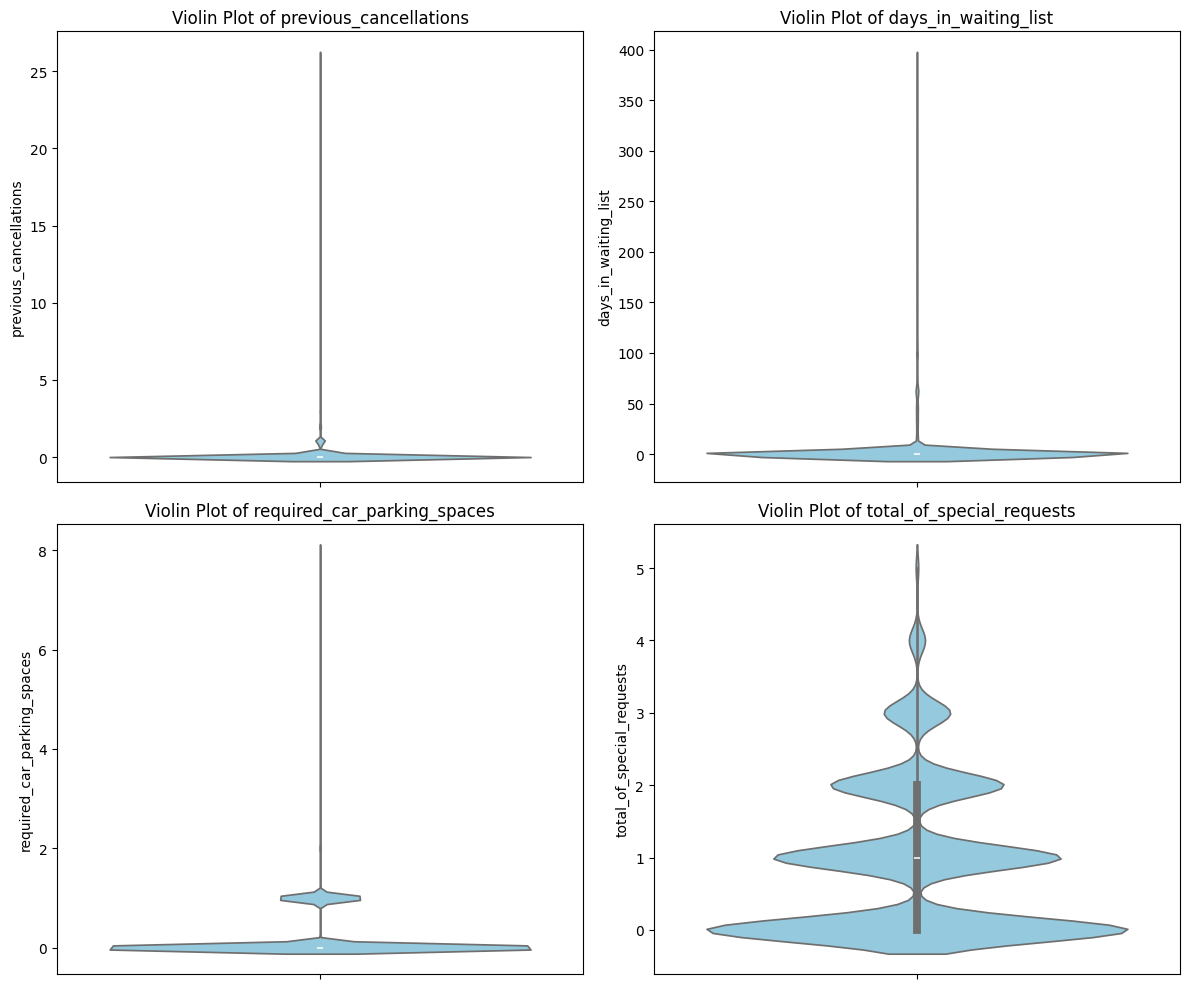

In [11]:
column_check = [
    'previous_cancellations', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests'
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(column_check):
    sns.violinplot(data=df, y=col, ax=axes[i], inner="box", color="skyblue")
    axes[i].set_title(f'Violin Plot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

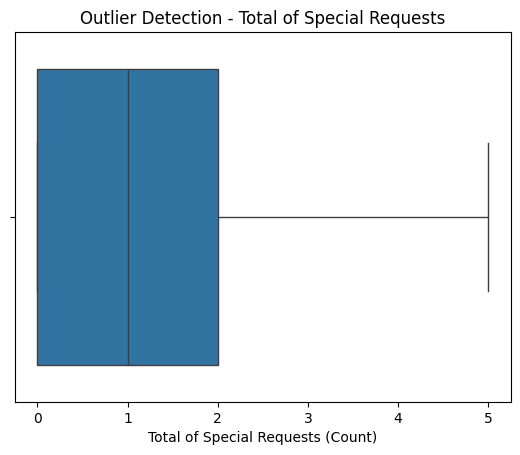

In [12]:
# Outlier Detection for Total of Special Requests
q1 = df['total_of_special_requests'].quantile(0.25)
q3 = df['total_of_special_requests'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

sns.boxplot(data=df, x='total_of_special_requests')
plt.title('Outlier Detection - Total of Special Requests')
plt.xlabel('Total of Special Requests (Count)')
plt.show()

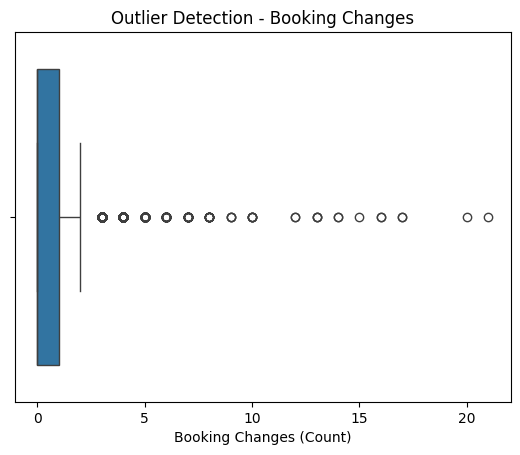

In [13]:
# Outlier Detection for Booking Changes
q1 = df['booking_changes'].quantile(0.25)
q3 = df['booking_changes'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

sns.boxplot(data=df, x='booking_changes')
plt.title('Outlier Detection - Booking Changes')
plt.xlabel('Booking Changes (Count)')
plt.show()

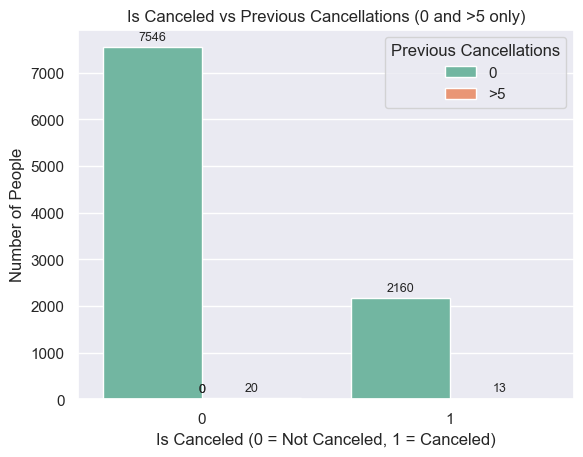

prev_canc_group,0,>5
is_canceled,,
0,7546,20
1,2160,13


In [121]:
# Is Canceled vs Previous Cancellation

df_prev = df.copy()

def categorize_prev_cancellations(x):
    if x == 0:
        return "0"
    elif x > 5:
        return ">5"
    else:
        return None

df_prev['prev_canc_group'] = df_prev['previous_cancellations'].apply(categorize_prev_cancellations)
df_prev = df_prev[df_prev['prev_canc_group'].notna()]

prev_counts = df_prev.groupby(['is_canceled', 'prev_canc_group']).size().reset_index(name='count')
prev_pivot = prev_counts.pivot(index='is_canceled', columns='prev_canc_group', values='count').fillna(0).astype(int)

ax = sns.barplot(
    data=prev_counts,
    x='is_canceled',
    y='count',
    hue='prev_canc_group',
    palette='Set2',
    ci=None
)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3), textcoords='offset points')

plt.title("Is Canceled vs Previous Cancellations (0 and >5 only)")
plt.xlabel("Is Canceled (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Number of People")
plt.legend(title="Previous Cancellations")
plt.show()

prev_pivot

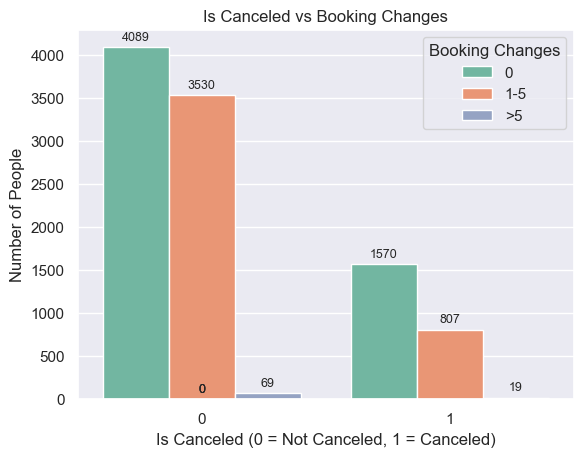

booking_changes_group,0,1-5,>5
is_canceled,,,
0,4089,3530,69
1,1570,807,19


In [122]:
df_book = df.copy()
df_book['booking_changes_group'] = pd.cut(df_book['booking_changes'], bins=[-1, 0, 5, df_book['booking_changes'].max()],
                                          labels=['0', '1-5', '>5'])

book_counts = df_book.groupby(['is_canceled', 'booking_changes_group']).size().reset_index(name='count')
book_pivot = book_counts.pivot(index='is_canceled', columns='booking_changes_group', values='count').fillna(0).astype(int)

ax = sns.barplot(
    data=book_counts,
    x='is_canceled',
    y='count',
    hue='booking_changes_group',
    palette='Set2',
    ci=None
)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3), textcoords='offset points')

plt.title("Is Canceled vs Booking Changes")
plt.xlabel("Is Canceled (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Number of People")
plt.legend(title="Booking Changes")
plt.show()

book_pivot

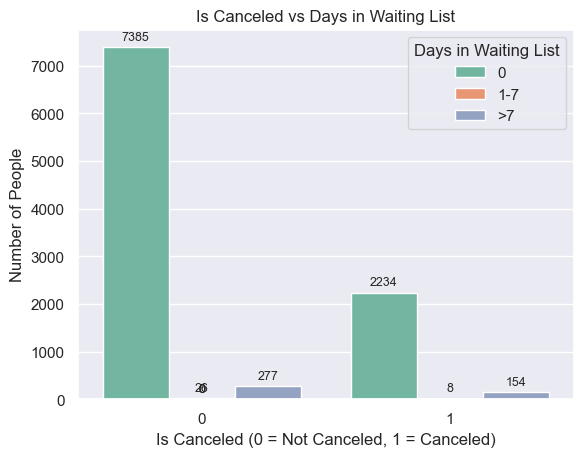

waiting_list_group,0,1-7,>7
is_canceled,,,
0,7385,26,277
1,2234,8,154


In [123]:
# Is Canceled vs Days in Waiting List

df_wait = df.copy()
df_wait['waiting_list_group'] = pd.cut(df_wait['days_in_waiting_list'],
                                       bins=[-1, 0, 7, df_wait['days_in_waiting_list'].max()],
                                       labels=['0', '1-7', '>7'])

wait_counts = df_wait.groupby(['is_canceled', 'waiting_list_group']).size().reset_index(name='count')
wait_pivot = wait_counts.pivot(index='is_canceled', columns='waiting_list_group', values='count').fillna(0).astype(int)

ax = sns.barplot(
    data=wait_counts,
    x='is_canceled',
    y='count',
    hue='waiting_list_group',
    palette='Set2',
    ci=None
)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3), textcoords='offset points')

plt.title("Is Canceled vs Days in Waiting List")
plt.xlabel("Is Canceled (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Number of People")
plt.legend(title="Days in Waiting List")
plt.show()

wait_pivot

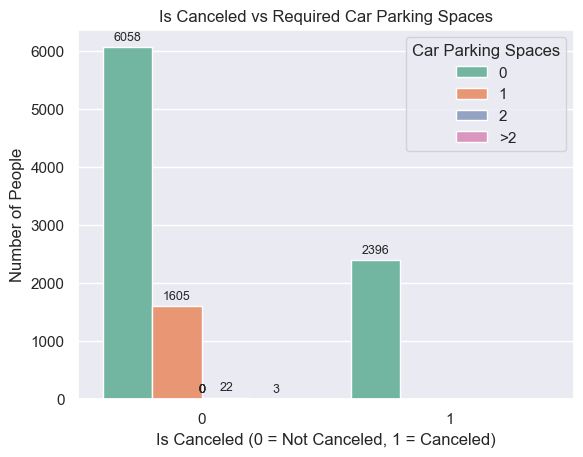

parking_group,0,1,2,>2
is_canceled,,,,
0,6058,1605,22,3
1,2396,0,0,0


In [124]:
#Is Canceled vs Required Car Parking Space

df_park = df.copy()
df_park['parking_group'] = df_park['required_car_parking_spaces'].apply(lambda x: x if x <= 2 else '>2')

park_counts = df_park.groupby(['is_canceled', 'parking_group']).size().reset_index(name='count')
park_pivot = park_counts.pivot(index='is_canceled', columns='parking_group', values='count').fillna(0).astype(int)

ax = sns.barplot(
    data=park_counts,
    x='is_canceled',
    y='count',
    hue='parking_group',
    palette='Set2',
    ci=None
)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3), textcoords='offset points')

plt.title("Is Canceled vs Required Car Parking Spaces")
plt.xlabel("Is Canceled (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Number of People")
plt.legend(title="Car Parking Spaces")
plt.show()

park_pivot

Berdasarkan lima visualisasi di atas untuk data numerik maka dapat disimpulkan:
- Is Canceled vs Previous Cancellations → Tamu yang membatalkan memiliki riwayat pembatalan sebelumnya lebih tinggi dibanding tamu yang tidak membatalkan.
- Is Canceled vs Days in Waiting List → Reservasi yang dibatalkan memiliki rata-rata hari menunggu lebih lama dibanding yang tidak dibatalkan.
- Is Canceled vs Booking Changes → Tamu yang membatalkan reservasi cenderung memiliki rata-rata jumlah perubahan pemesanan yang lebih rendah dibandingkan tamu yang tidak membatalkan.
- Is Canceled vs Required Car Parking Spaces → Hampir tidak ada pembatalan pada reservasi yang memerlukan tempat parkir mobil.
- Outlier Detection - Total of Special Requests → Sebagian besar tamu mengajukan 0–2 permintaan khusus, dengan sedikit kasus yang mencapai hingga 5 permintaan.


## Sekilas Pandang Kolom Data Kategorial

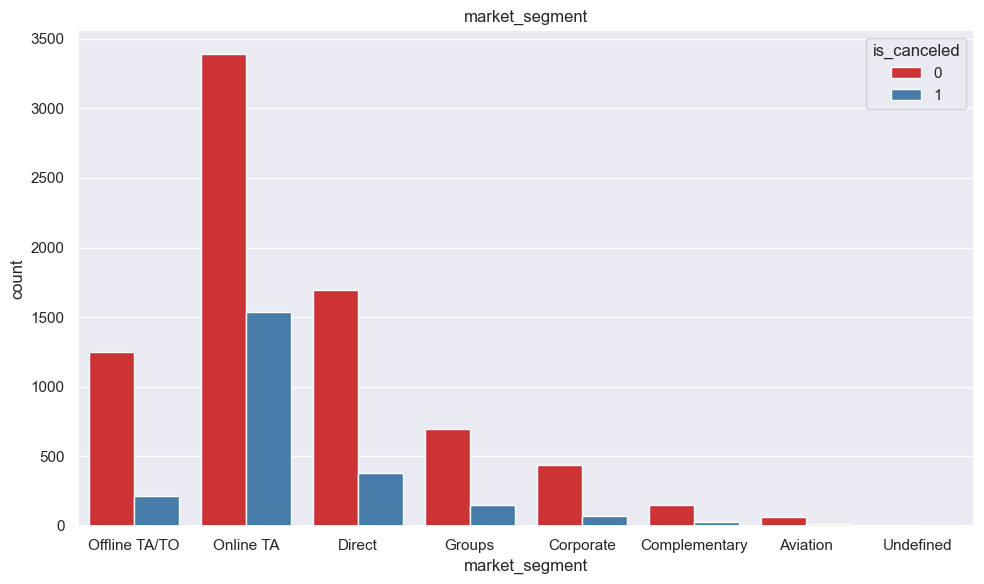

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,64,152,435,1698,696,1253,3390,0
1,17,28,70,381,149,216,1534,1


In [126]:
# Market Segment Overview
plt.figure(figsize=(10, 6))
sns.set(palette='Set1')
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.xlabel('market_segment')
plt.title('market_segment')
plt.tight_layout()
plt.show()

market_counts = df.groupby(['is_canceled', 'market_segment']).size().reset_index(name='count')
market_pivot = market_counts.pivot(index='is_canceled', columns='market_segment', values='count').fillna(0).astype(int)
market_pivot

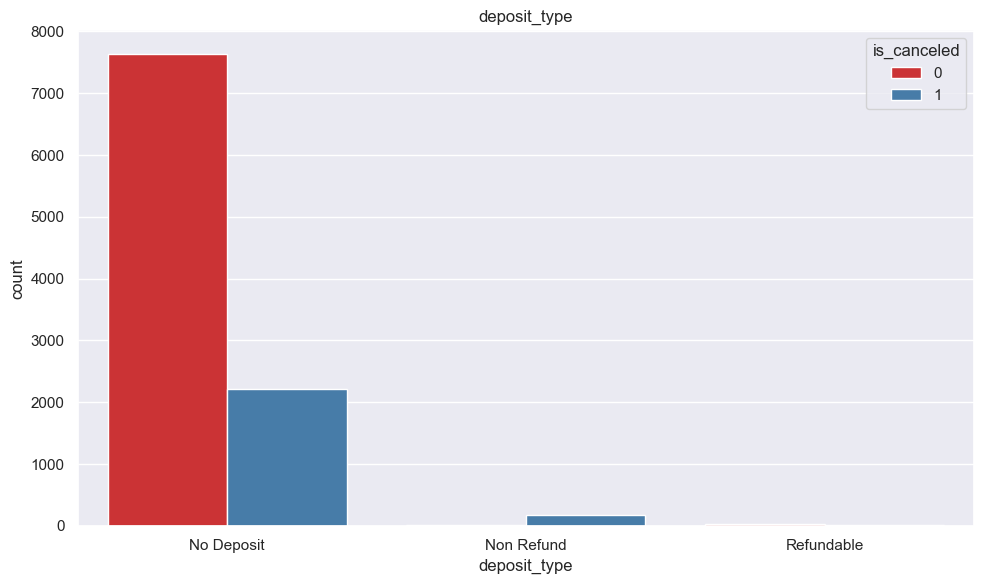

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,7634,21,33
1,2209,173,14


In [127]:
# Deposit Type Overview
plt.figure(figsize=(10, 6))
sns.set(palette='Set1')
sns.countplot(x='deposit_type', hue='is_canceled', data=df)
plt.xlabel('deposit_type')
plt.title('deposit_type')
plt.tight_layout()
plt.show()

deposit_counts = df.groupby(['is_canceled', 'deposit_type']).size().reset_index(name='count')
deposit_pivot = deposit_counts.pivot(index='is_canceled', columns='deposit_type', values='count').fillna(0).astype(int)
deposit_pivot

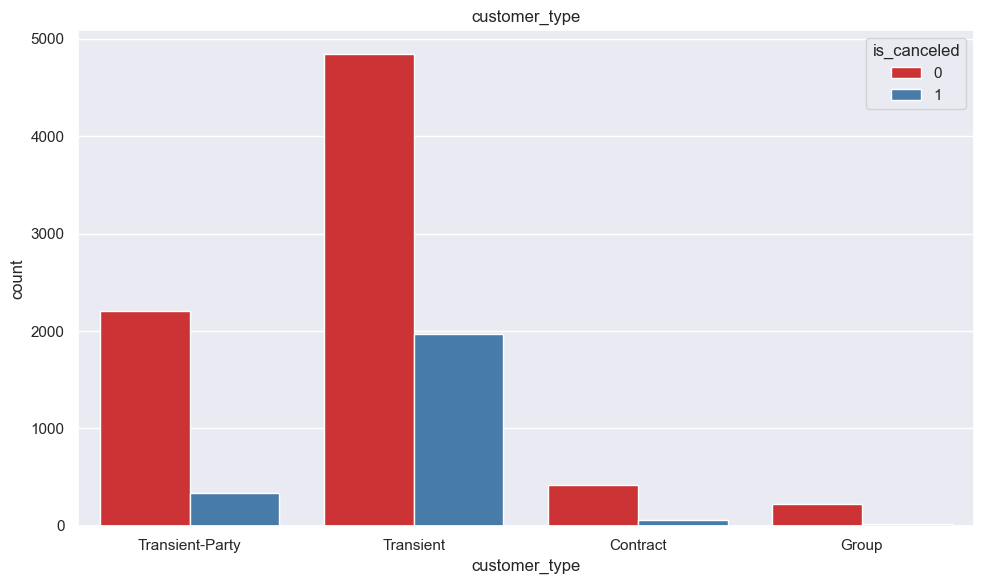

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,418,221,4842,2207
1,63,20,1971,342


In [128]:
# Customer Type Overview
plt.figure(figsize=(10, 6))
sns.set(palette='Set1')
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.xlabel('customer_type')
plt.title('customer_type')
plt.tight_layout()
plt.show()

customer_counts = df.groupby(['is_canceled', 'customer_type']).size().reset_index(name='count')
customer_pivot = customer_counts.pivot(index='is_canceled', columns='customer_type', values='count').fillna(0).astype(int)
customer_pivot

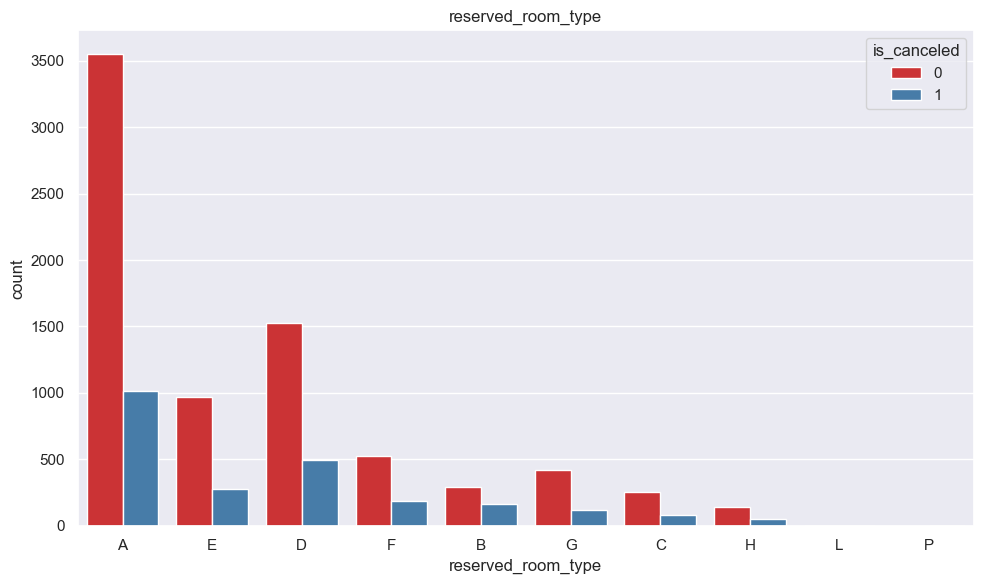

reserved_room_type,A,B,C,D,E,F,G,H,L,P
is_canceled,,,,,,,,,,
0,3549,292,258,1528,968,527,424,141,1,0
1,1013,162,81,497,280,188,122,51,1,1


In [130]:
# Reserved Room Type Overview
plt.figure(figsize=(10, 6))
sns.set(palette='Set1')
sns.countplot(x='reserved_room_type', hue='is_canceled', data=df)
plt.xlabel('reserved_room_type')
plt.title('reserved_room_type')
plt.tight_layout()
plt.show()


room_counts = df.groupby(['is_canceled', 'reserved_room_type']).size().reset_index(name='count')
room_pivot = room_counts.pivot(index='is_canceled', columns='reserved_room_type', values='count').fillna(0).astype(int)
room_pivot

Berikut kesimpulan satu kalimat per diagram:
- Market Segment – Segmen Online TA menyumbang pemesanan terbanyak sekaligus pembatalan terbanyak, diikuti oleh segmen Direct.
- Deposit Type – Sebagian besar tamu tidak memberikan deposit (No Deposit), dan kelompok ini mendominasi jumlah pembatalan.
- Customer Type – Mayoritas tamu berasal dari kategori Transient, dengan tingkat pembatalan yang juga relatif tinggi dibanding kategori lain.
- Reserved Room Type – Tipe kamar A paling sering dipesan namun juga memiliki jumlah pembatalan tertinggi dibanding tipe kamar lainnya.



## **Section 4. Data Generation**

## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function
- Define Feature and Target

Define Feature and Target

In [22]:
# Define X dan y
X = df.drop(columns = 'is_canceled')
y = df['is_canceled']

Correlation Matrix

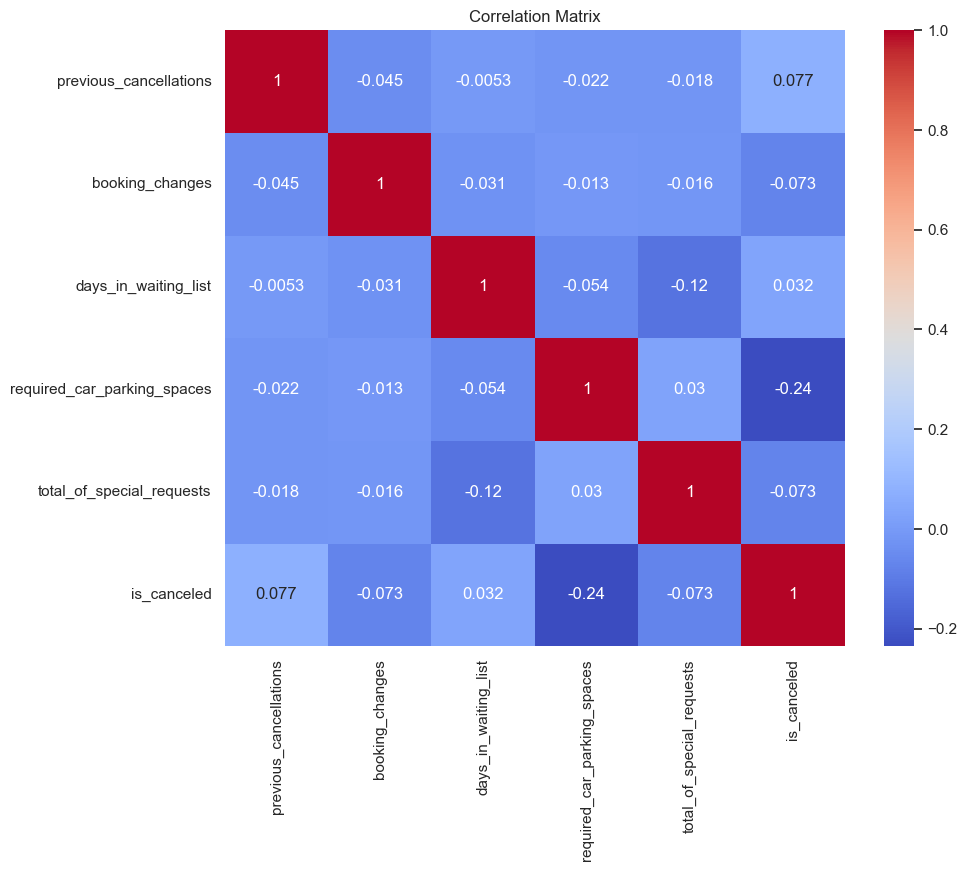

In [23]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Melihat Korelasi Feature pada Kolom Data Kategorikal

In [24]:
from scipy.stats import chi2_contingency

cat_features = ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']

for feature in cat_features:
    pivot = pd.crosstab(df[feature], df['is_canceled'])

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(pivot)

    print(f"p-value: {p}\t Is Canceled vs {feature}")
    display(pivot)
    print()

p-value: 1.156492010758286e-52	 Is Canceled vs country


is_canceled,0,1
country,,
ABW,2,0
AGO,59,30
AIA,1,0
ALB,4,1
AND,1,4
...,...,...
VGB,0,1
VNM,3,2
ZAF,25,11



p-value: 8.250122987159194e-62	 Is Canceled vs market_segment


is_canceled,0,1
market_segment,,
Aviation,64,17
Complementary,152,28
Corporate,435,70
Direct,1698,381
Groups,696,149
Offline TA/TO,1253,216
Online TA,3390,1534
Undefined,0,1



p-value: 1.7131688765065214e-102	 Is Canceled vs deposit_type


is_canceled,0,1
deposit_type,,
No Deposit,7634,2209
Non Refund,21,173
Refundable,33,14



p-value: 1.4916845263018316e-67	 Is Canceled vs customer_type


is_canceled,0,1
customer_type,,
Contract,418,63
Group,221,20
Transient,4842,1971
Transient-Party,2207,342



p-value: 5.4947678356291975e-08	 Is Canceled vs reserved_room_type


is_canceled,0,1
reserved_room_type,,
A,3549,1013
B,292,162
C,258,81
D,1528,497
E,968,280
F,527,188
G,424,122
H,141,51
L,1,1


## Melihat Korelasi Feature pada Kolom Data Numerikal

In [25]:
from scipy.stats import spearmanr

num_features = [
    'previous_cancellations',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

for feature in num_features:
    corr, pvalue = spearmanr(df[feature], df['is_canceled'])
    print(f"Spearman correlation: {corr:.4f} | p-value: {pvalue:.4e} \t is_canceled vs {feature}")

Spearman correlation: 0.1780 | p-value: 1.4199e-72 	 is_canceled vs previous_cancellations
Spearman correlation: -0.0982 | p-value: 5.0601e-23 	 is_canceled vs booking_changes
Spearman correlation: 0.0567 | p-value: 1.2459e-08 	 is_canceled vs days_in_waiting_list
Spearman correlation: -0.2451 | p-value: 8.0356e-138 	 is_canceled vs required_car_parking_spaces
Spearman correlation: -0.0742 | p-value: 8.7179e-14 	 is_canceled vs total_of_special_requests


Data Splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

**6.2 Data Transformation (Feature Engineering)**

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
import category_encoders as ce  

# Features
country_feature = ['country']
other_cat_features = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
num_features = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
                'required_car_parking_spaces', 'total_of_special_requests']

# ColumnTransformer
transformer = ColumnTransformer([
    ('country_feature', ce.BinaryEncoder(cols=country_feature, drop_invariant=True), country_feature),
    ('other_cat_features', OneHotEncoder(drop='first', handle_unknown='ignore'), other_cat_features),
    ('num_features', RobustScaler(), num_features)
])

# Pipeline
pipe = Pipeline([
    ('preprocessing', transformer),
    ('select_features', SelectKBest(score_func=f_classif, k='all'))
])

# Fit-transform
X_transformed = pipe.fit_transform(X, y)

# Feature Names 

# BinaryEncoder names
country_encoder = pipe.named_steps['preprocessing'].named_transformers_['country_feature']
if hasattr(country_encoder, "get_feature_names_out"):
    country_feature_names = country_encoder.get_feature_names_out()
else:
    country_feature_names = list(country_encoder.columns_)

# OneHotEncoder names
onehot_encoder = pipe.named_steps['preprocessing'].named_transformers_['other_cat_features']
onehot_feature_names = onehot_encoder.get_feature_names_out(other_cat_features)

# Numeric features (unchanged names)
numeric_feature_names = num_features

# Combine all feature names in correct order
all_feature_names = np.array(list(country_feature_names) + list(onehot_feature_names) + numeric_feature_names)

# ----- Get Selected Features -----
mask = pipe.named_steps['select_features'].get_support()
selected_feature_names = all_feature_names[mask]

# DataFrame output
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)


print(X_transformed_df.head())


   country_0  country_1  country_2  country_3  country_4  country_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        1.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   country_6  country_7  market_segment_Complementary  \
0        0.0        1.0                           0.0   
1        1.0        0.0                           0.0   
2        1.0        1.0                           0.0   
3        0.0        0.0                           0.0   
4        1.0        1.0                           0.0   

   market_segment_Corporate  ...  reserved_room_type_F  reserved_room_type_G  \
0                       0.0  ...                   0.0                   0.0   
1                       0.0  ...                   0.0                

In [28]:
# resampling
smote = SMOTE(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [29]:
selector = pipe.named_steps['select_features']
print("SelectKBest k:", selector.k)
print("Number of features before selection:", selector.scores_.shape[0])
print("Number of features selected:", selector.get_support().sum())
print("Feature scores (first 10):", selector.scores_[:10])

SelectKBest k: all
Number of features before selection: 34
Number of features selected: 34
Feature scores (first 10): [5.11892691e-02 2.42308443e+01 1.65005497e+00 2.08124484e-01
 5.04553230e+01 7.72259285e+01 3.84405127e+01 3.67861158e+01
 6.81411580e+00 2.88342491e+01]


In [30]:
X_transformed = pipe.transform(X)
print("Shape of X_transformed after transform:", X_transformed.shape)

Shape of X_transformed after transform: (10084, 34)


## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

**7.2 Developing the Model Pipeline**

**7.3 Model Benchmarking (Comparing model base performance)**

In [31]:
# Menyiapkan model untuk benchmarking
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced') 
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)

In [32]:
ros = RandomOverSampler(random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Models 
models = [logreg, knn, tree, rf, ada, gbc]

score, mean_score, std_score = [], [], []

for model in models:
    fold_scores = []
    
    for train_index, val_index in skf.split(X_train, y_train):
        # Split fold
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Transform features
        X_tr_trans = transformer.fit_transform(X_tr, y_tr)  # fit transformer on train fold
        X_val_trans = transformer.transform(X_val)           # transform validation fold

        # Oversample training data
        X_tr_res, y_tr_res = ros.fit_resample(X_tr_trans, y_tr)

        # Fit model
        model.fit(X_tr_res, y_tr_res)

        # Predict on validation fold
        y_pred = model.predict(X_val_trans)

        # Compute F2 score
        f2 = fbeta_score(y_val, y_pred, beta=2)
        fold_scores.append(f2)
    
    score.append(fold_scores)
    mean_score.append(np.mean(fold_scores))
    std_score.append(np.std(fold_scores))

results_df = pd.DataFrame({
    'Model': [m.__class__.__name__ for m in models],
    'F2_mean': mean_score,
    'F2_std': std_score
})
print(results_df)

                        Model   F2_mean    F2_std
0          LogisticRegression  0.674196  0.008063
1        KNeighborsClassifier  0.515577  0.015258
2      DecisionTreeClassifier  0.375681  0.011696
3      RandomForestClassifier  0.416639  0.009929
4          AdaBoostClassifier  0.355275  0.011818
5  GradientBoostingClassifier  0.701303  0.015378


In [33]:
df_cv = pd.DataFrame({
    'model':['logreg', 'knn', 'tree', 'rf',' ada', 'gbc'],
    'mean': mean_score,
    'std': std_score
})

df_cv

,model,mean,std
0,logreg,0.674196,0.008063
1,knn,0.515577,0.015258
2,tree,0.375681,0.011696
3,rf,0.416639,0.009929
4,ada,0.355275,0.011818
5,gbc,0.701303,0.015378


Akan memilih tuning random GBC dan logreg

**7.4 Tune Model**

**Hyperparameter Tuning**

7.4.1 Gradient Boosting

In [34]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Pipeline
pipe = Pipeline([
    ('transformer', transformer),
    ('resampler', RandomOverSampler(random_state=0)),
    ('model', gbc)
])

# Hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_gbc = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=30,           
    scoring=f2_scorer,   
    cv=skf,
    random_state=0,
    n_jobs=-1
)

# Fitting
random_gbc.fit(X_train, y_train)

# CV results
import pandas as pd
cv_results_df = pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score').head()
print(cv_results_df)

print("Best hyperparameters:", random_gbc.best_params_)
print("Best F2 (CV):", random_gbc.best_score_)

/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/s

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
16       8.240842      0.286107         0.063914        0.010844   
7       24.842854      0.645175         0.160841        0.071715   
22      24.597039      0.574048         0.097546        0.011525   
24      12.307845      0.260742         0.094824        0.025075   
2       19.234247      0.636778         0.113037        0.037964   

    param_model__n_estimators  param_model__min_samples_split  \
16                        100                               5   
7                         300                               5   
22                        300                               5   
24                        200                               2   
2                         300                               5   

    param_model__min_samples_leaf  param_model__max_depth  \
16                              4                       7   
7                               4                       7   
22               

Threshold Optimization

In [35]:
y_prob = random_gbc.best_estimator_.predict_proba(X_val)[:, 1]

# Best Threshold Search
best_f2 = 0
best_thresh = 0.5

for thresh in np.arange(0.1, 0.6, 0.05):
    y_pred_thresh = (y_prob >= thresh).astype(int)
    f2 = fbeta_score(y_val, y_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_thresh = thresh

print("Optimal threshold:", best_thresh)
print("F2 at optimal threshold:", best_f2)

Optimal threshold: 0.45000000000000007
F2 at optimal threshold: 0.7733887733887734


GradientBoost CV Results

In [36]:
cv_results_df = pd.DataFrame(random_gbc.cv_results_)

# Select only the most relevant columns
columns_of_interest = [
    'rank_test_score',
    'mean_test_score',
    'std_test_score',
    'params'
]

cv_results_df = cv_results_df[columns_of_interest]

# Sort by rank and show top 5
top5 = cv_results_df.sort_values(by='rank_test_score').head()
print(top5)

    rank_test_score  mean_test_score  std_test_score  \
16                1         0.718827        0.010816   
7                 2         0.715436        0.015559   
22                3         0.715394        0.018975   
24                4         0.706064        0.010308   
2                 5         0.705876        0.016287   

                                                                                                                                            params  
16  {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 7, 'model__learning_rate': 0.01}  
7   {'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 7, 'model__learning_rate': 0.01}  
22  {'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_depth': 7, 'model__learning_rate': 0.01}  
24  {'model__n_estimators': 200, 'model__min_samples_split': 2, 'mo

In [37]:
print("GBC")
print("Best CV score (threshold=0.5):", random_gbc.best_score_)
print("Best hyperparameters:", random_gbc.best_params_)
print("Optimal threshold on validation set:", best_thresh)
print("F2 at optimal threshold:", best_f2)

GBC
Best CV score (threshold=0.5): 0.7188274180662032
Best hyperparameters: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 7, 'model__learning_rate': 0.01}
Optimal threshold on validation set: 0.45000000000000007
F2 at optimal threshold: 0.7733887733887734


7.4.1 Logistic Regression

In [38]:
f2_scorer = make_scorer(fbeta_score, beta=2)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

logreg = LogisticRegression(random_state=0, max_iter=200)

# Pipeline: transformer -> resampler -> model
pipe = Pipeline([
    ('transformer', transformer),
    ('resampler', RandomOverSampler(random_state=0)),
    ('model', logreg)
])

# Hyperparameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__solver': ['saga'],   # saga supports l1, l2, elasticnet
    'model__l1_ratio': [0, 0.5, 1]  # only used if penalty='elasticnet'
}

# Randomized search
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=50,           # number of random combinations
    scoring=f2_scorer,   # maximize F2
    cv=skf,
    random_state=0,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best hyperparameters:", search.best_params_)
print("Best F2 (CV):", search.best_score_)

/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coe

Best hyperparameters: {'model__solver': 'saga', 'model__penalty': 'l1', 'model__l1_ratio': 0.5, 'model__C': 0.01}
Best F2 (CV): 0.6591715978041679


In [39]:
# Fit Logistic Regression on full training setrandom_logreg = search.best_estimator_
random_logreg = search.best_estimator_
random_logreg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('country_feature',
                                                  BinaryEncoder(cols=['country'],
                                                                drop_invariant=True),
                                                  ['country']),
                                                 ('other_cat_features',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('num_features',
                                                  RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests'])])),
                ('resampler', RandomOverSampler(random_state=0)),
                ('model',
                 LogisticRegression(C=0.01, l1_ratio=0.5, max_iter=200,
                                    penalty='l1', random_state=0,
                                    solver='saga'))])

Threshold Optimization

In [40]:
y_prob = random_logreg.predict_proba(X_val)[:,1]

best_f2 = 0
best_thresh = 0.5
for thresh in np.arange(0.1, 0.6, 0.05):
    y_pred_thresh = (y_prob >= thresh).astype(int)
    f2 = fbeta_score(y_val, y_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_thresh = thresh

print("Optimal threshold:", best_thresh)
print("F2 at optimal threshold:", best_f2)

Optimal threshold: 0.40000000000000013
F2 at optimal threshold: 0.7007722007722008


Logistic Regression CV Results

In [41]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__solver,param_model__penalty,param_model__l1_ratio,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,3.687970,0.320947,0.042434,0.011215,saga,l1,1.0,0.01,"{'model__solver': 'saga', 'model__penalty': 'l1', 'model__l1_ratio': 1, 'model__C': 0.01}",0.646006,0.647906,0.682722,0.655488,0.663736,0.659172,0.013336,1
11,4.451009,0.332985,0.054795,0.002428,saga,elasticnet,1.0,0.01,"{'model__solver': 'saga', 'model__penalty': 'elasticnet', 'model__l1_ratio': 1, 'model__C': 0.01}",0.646006,0.647906,0.682722,0.655488,0.663736,0.659172,0.013336,1
10,3.787379,0.253838,0.053418,0.013949,saga,l1,0.5,0.01,"{'model__solver': 'saga', 'model__penalty': 'l1', 'model__l1_ratio': 0.5, 'model__C': 0.01}",0.646006,0.647906,0.682722,0.655488,0.663736,0.659172,0.013336,1
24,4.138190,0.284757,0.040436,0.011410,saga,elasticnet,0.5,0.10,"{'model__solver': 'saga', 'model__penalty': 'elasticnet', 'model__l1_ratio': 0.5, 'model__C': 0.1}",0.647321,0.642952,0.673034,0.661340,0.665773,0.658084,0.011296,4
32,3.966880,0.114141,0.044892,0.008824,saga,l1,1.0,0.10,"{'model__solver': 'saga', 'model__penalty': 'l1', 'model__l1_ratio': 1, 'model__C': 0.1}",0.646168,0.644023,0.674357,0.662090,0.663539,0.658035,0.011404,5


In [42]:
print("Logistic Regression")
print("Best CV score (threshold=0.5):", search.best_score_)
print("Best hyperparameters:", search.best_params_)
print("Optimal threshold on validation set:", best_thresh)
print("F2 at optimal threshold:", best_f2)

Logistic Regression
Best CV score (threshold=0.5): 0.6591715978041679
Best hyperparameters: {'model__solver': 'saga', 'model__penalty': 'l1', 'model__l1_ratio': 0.5, 'model__C': 0.01}
Optimal threshold on validation set: 0.40000000000000013
F2 at optimal threshold: 0.7007722007722008


**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

### Before Hyperparameter Tuning

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)

# Pipeline
estimator_gbc = Pipeline([
    ('transformer', transformer),
    ('balancing', smote),
    ('model', gbc)
])

# Train
estimator_gbc.fit(X_train, y_train)

# Prediction at 0.5 threshold
y_pred_benchmark = estimator_gbc.predict(X_test)
f2_benchmark_05 = fbeta_score(y_test, y_pred_benchmark, beta=2)

# Tuning Prediction Probabilities
y_proba_benchmark = estimator_gbc.predict_proba(X_test)[:, 1]

# Threshold for best F2
thresholds = np.linspace(0, 1, 101)
f2_scores = [
    fbeta_score(y_test, (y_proba_benchmark >= t).astype(int), beta=2) 
    for t in thresholds
]
best_threshold_benchmark = thresholds[np.argmax(f2_scores)]
f2_benchmark_best = max(f2_scores)

print(f"Benchmark Gradient Boosting F2 (0.5 threshold): {f2_benchmark_05:.4f}")
print(f"Benchmark Gradient Boosting F2 (best threshold {best_threshold_benchmark:.2f}): {f2_benchmark_best:.4f}")

Benchmark Gradient Boosting F2 (0.5 threshold): 0.5961
Benchmark Gradient Boosting F2 (best threshold 0.27): 0.7402


### After Hyperparameter Tuning

In [44]:
# Estimator
estimator_gbc = Pipeline([
    ('transformer', transformer),
    ('model', GradientBoostingClassifier(random_state=0))
])

# Hyperparameter grid 
param_grid = {
    'model__n_estimators': [200, 300],           # fewer options
    'model__max_depth': [4, 5],                  # moderate depth only
    'model__learning_rate': [0.01, 0.03],       # lower LR for smoother probs
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [2, 4],
    'model__subsample': [0.8, 1.0]
}

# RandomizedSearchCV 
f2_scorer = make_scorer(fbeta_score, beta=2)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

random_gbc = RandomizedSearchCV(
    estimator=estimator_gbc,
    param_distributions=param_grid,
    n_iter=15,        # fewer iterations, still covers key combos
    scoring=f2_scorer,
    cv=skf,
    random_state=0,
    n_jobs=-1
)

# Training Data Fitting
random_gbc.fit(X_train, y_train)

# Best estimator 
gbc_tuning = random_gbc.best_estimator_
print("Best hyperparameters:", random_gbc.best_params_)

#  Probability Prediction on Validation Set
thresholds = np.arange(0.1, 0.9, 0.01)
y_proba_val = gbc_tuning.predict_proba(X_val)[:, 1]

f2_scores_val = [fbeta_score(y_val, (y_proba_val >= t).astype(int), beta=2) 
                 for t in thresholds]
best_threshold = thresholds[np.argmax(f2_scores_val)]
f2_val_best = max(f2_scores_val)

print(f"Optimal threshold (val set): {best_threshold:.2f}")
print(f"Best F2 on validation set: {f2_val_best:.4f}")

# Evaluation on Test Set (Default 0.5 Threshold)
y_pred_test_05 = gbc_tuning.predict(X_test)
f2_test_05 = fbeta_score(y_test, y_pred_test_05, beta=2)

# Evaluation on Test Set (Tuned Threshold)
y_pred_test_best = (gbc_tuning.predict_proba(X_test)[:, 1] >= best_threshold).astype(int)
f2_test_best = fbeta_score(y_test, y_pred_test_best, beta=2)

# --- Print results in benchmark style ---
print(f"Tuned Gradient Boosting F2 (0.5 threshold): {f2_test_05:.4f}")
print(f"Tuned Gradient Boosting F2 (best threshold {best_threshold:.2f}): {f2_test_best:.4f}")

/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/s

Best hyperparameters: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': 5, 'model__learning_rate': 0.03}
Optimal threshold (val set): 0.17
Best F2 on validation set: 0.7856
Tuned Gradient Boosting F2 (0.5 threshold): 0.3425
Tuned Gradient Boosting F2 (best threshold 0.17): 0.7573


Classification Report (Before and After Turning)

In [45]:
# Before Tuning
print(">> Before Tuning:")
print(f"F2 Score (0.5 threshold): {f2_benchmark_05:.4f}")
print(f"F2 Score (best threshold {best_threshold_benchmark:.2f}): {f2_benchmark_best:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_benchmark))
print("\n" + "-"*60 + "\n")


>> Before Tuning:
F2 Score (0.5 threshold): 0.5961
F2 Score (best threshold 0.27): 0.7402
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1538
           1       0.49      0.63      0.55       479

    accuracy                           0.76      2017
   macro avg       0.68      0.71      0.69      2017
weighted avg       0.78      0.76      0.77      2017


------------------------------------------------------------



In [46]:
# After Tuning 
print(">> After Tuning:")
print(f"F2 Score (0.5 threshold): {f2_test_05:.4f}")
print(f"F2 Score (best threshold {best_threshold:.2f}): {f2_test_best:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_best))
print("\nBest Hyperparameters:", random_gbc.best_params_)


>> After Tuning:
F2 Score (0.5 threshold): 0.3425
F2 Score (best threshold 0.17): 0.7573
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.61      0.75      1538
           1       0.43      0.94      0.59       479

    accuracy                           0.69      2017
   macro avg       0.70      0.77      0.67      2017
weighted avg       0.84      0.69      0.71      2017


Best Hyperparameters: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': 5, 'model__learning_rate': 0.03}


**7.6 Model Calibration (Classification Only)**

Mencari BestModel dengan GridSearch 

In [47]:
# Gradient Boosting estimator pipeline
estimator_gbc = Pipeline([
    ('transformer', transformer),  # your preprocessing
    ('model', GradientBoostingClassifier(random_state=0))
])

# Hyperparameter grid
param_grid = {
    'model__subsample': [0.8, 1.0], 
    'model__n_estimators': [200, 250, 300], 
    'model__max_depth': [4, 5, 6], 
    'model__learning_rate': [0.01, 0.03, 0.05]
}

In [48]:
# Run GridSearch

grid_gbc = GridSearchCV(
    estimator=estimator_gbc,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
grid_gbc.fit(X_train, y_train)

/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/dugiyadi/xgb_env/lib/python3.11/site-packages/sklearn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('country_feature',
                                                                         BinaryEncoder(cols=['country'],
                                                                                       drop_invariant=True),
                                                                         ['country']),
                                                                        ('other_cat_features',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'customer_type',
                                                                          'reserved_room_type']),
                                                                        ('num_features',
                                                                         RobustScaler(...
                                                                          'required_car_parking_spaces',
                                                                          'total_of_special_requests'])])),
                                       ('model',
                                        GradientBoostingClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.03, 0.05],
                         'model__max_depth': [4, 5, 6],
                         'model__n_estimators': [200, 250, 300],
                         'model__subsample': [0.8, 1.0]},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [49]:
print("Best hyperparameters:", grid_gbc.best_params_)
print("Best CV F2 score:", grid_gbc.best_score_)

Best hyperparameters: {'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 250, 'model__subsample': 0.8}
Best CV F2 score: 0.37817069535599696


In [50]:
cv_results = pd.DataFrame(grid_gbc.cv_results_)

cols = [
    'params', 
    'mean_test_score', 
    'std_test_score', 
    'rank_test_score',
    'split0_test_score', 
    'split1_test_score', 
    'split2_test_score', 
    'split3_test_score', 
    'split4_test_score'
]
table = cv_results[cols].sort_values(by='rank_test_score', ascending=True)
pd.set_option('display.max_colwidth', None)
print(table.to_string(index=False))

                                                                                                    params  mean_test_score  std_test_score  rank_test_score  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score
{'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 250, 'model__subsample': 0.8}         0.378171        0.025478                1           0.373386           0.425650           0.349233           0.367024           0.375561
{'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 300, 'model__subsample': 0.8}         0.377568        0.037633                2           0.381572           0.436486           0.322209           0.357961           0.389610
{'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 300, 'model__subsample': 0.8}         0.376319        0.025266                3           0.357344           0.417812           0.343856           0.379464           0

In [51]:
best_gbc = grid_gbc.best_estimator_

# Split validation set from training for threshold tuning
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# Predicted probabilities on validation set
y_proba_val = best_gbc.predict_proba(X_val)[:, 1]

Threshold Tuning

In [52]:
thresholds = np.arange(0, 1.01, 0.01)
f2_scores = []

for t in thresholds:
    y_pred_t = (y_proba_val >= t).astype(int)
    f2 = fbeta_score(y_val, y_pred_t, beta=2)
    f2_scores.append(f2)

best_idx = np.argmax(f2_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold: {best_threshold:.2f}")
print(f"Validation F2 score at best threshold: {f2_scores[best_idx]:.4f}")

Best threshold: 0.21
Validation F2 score at best threshold: 0.8075


In [53]:
# Tuned Threshold on Test Set
y_proba_test = best_gbc.predict_proba(X_test)[:, 1]
y_pred_test = (y_proba_test >= best_threshold).astype(int)

print("Test set performance with tuned threshold:")
print(classification_report(y_test, y_pred_test))

# Benchmark-style F2
f2_test_05 = fbeta_score(y_test, best_gbc.predict(X_test), beta=2)
f2_test_best = fbeta_score(y_test, y_pred_test, beta=2)

print(f"Tuned Gradient Boosting F2 (0.5 threshold): {f2_test_05:.4f}")
print(f"Tuned Gradient Gradient Boosting F2 (best threshold {best_threshold:.2f}): {f2_test_best:.4f}")

Test set performance with tuned threshold:
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1538
           1       0.44      0.86      0.58       479

    accuracy                           0.71      2017
   macro avg       0.69      0.76      0.68      2017
weighted avg       0.82      0.71      0.73      2017

Tuned Gradient Boosting F2 (0.5 threshold): 0.3506
Tuned Gradient Gradient Boosting F2 (best threshold 0.21): 0.7238


In [54]:
best_idx = np.argmax(f2_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold: {best_threshold:.2f}, Best F2: {f2_scores[best_idx]:.4f}")

Best threshold: 0.21, Best F2: 0.8075


## **Section 8. Testing with New Dataset**

With Synthetic Dataset

In [55]:
# Generating Random New Dataset

n_samples = 50  

X_new_test = pd.DataFrame({
    col: np.random.choice(X_train[col].unique(), n_samples) 
        if X_train[col].dtype == 'object' else
    np.random.uniform(X_train[col].min(), X_train[col].max(), n_samples)
    for col in X_train.columns
})

# Dummy target
y_new_test = pd.Series(np.random.randint(0, 2, n_samples), name='Target')

print("Random Synthetic Test Dataset (Features):")
display(X_new_test)

print("Dummy Target Labels:")
display(y_new_test)

Random Synthetic Test Dataset (Features):


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
0,VGB,Offline TA/TO,0.218793,10.827350,Refundable,200.737009,Group,G,3.402818,0.802319
1,PRI,Online TA,7.628302,11.016567,Non Refund,10.718215,Group,H,2.215535,1.163193
2,MAC,Corporate,7.900351,12.534224,No Deposit,372.486437,Transient,C,3.850431,3.920515
3,GAB,Corporate,19.942860,6.669615,Refundable,146.359805,Transient-Party,F,0.459911,3.391614
4,UZB,Online TA,5.518623,3.705304,Non Refund,82.204796,Group,D,7.969588,4.363193
5,PAK,Corporate,1.307623,8.223457,Refundable,18.991981,Transient,L,4.473642,3.423179
6,DEU,Undefined,17.070476,1.022827,Non Refund,260.065506,Group,P,5.170970,0.813780
7,CAF,Online TA,23.385795,6.009339,Refundable,320.152371,Group,E,7.982689,2.010046
8,FRO,Direct,5.007248,12.832749,No Deposit,153.467924,Group,H,7.111649,3.574191
9,GAB,Groups,25.457312,18.339005,Non Refund,377.517855,Group,A,5.600429,1.430832


Dummy Target Labels:


0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     1
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    0
17    1
18    0
19    0
20    1
21    1
22    0
23    1
24    0
25    1
26    0
27    0
28    0
29    1
30    1
31    1
32    1
33    1
34    0
35    1
36    1
37    1
38    0
39    0
40    0
41    1
42    0
43    0
44    1
45    1
46    0
47    1
48    1
49    0
Name: Target, dtype: int64

Predicting with the tuned Gradient Boosting pipeline

In [56]:
# Getting predicted probabilities
y_new_prob = random_gbc.best_estimator_.predict_proba(X_new_test)[:, 1]

# Predicting with the previously found best threshold
y_new_pred = (y_new_prob >= best_threshold).astype(int)

Evaluating Performance on the New Dataset

In [57]:
# Best Threshold

f2_new = fbeta_score(y_new_test, y_new_pred, beta=2)
print(f"F2 Score on synthetic test set (threshold {best_thresh:.2f}): {best_f2:.4f}")

print("Classification Report on synthetic test set:")
print(classification_report(y_new_test, y_new_pred))



F2 Score on synthetic test set (threshold 0.40): 0.7008
Classification Report on synthetic test set:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        24
           1       0.00      0.00      0.00        26

    accuracy                           0.48        50
   macro avg       0.24      0.50      0.32        50
weighted avg       0.23      0.48      0.31        50



Hasil F2 Score belum optimal, sehingga akan dilakukan additional tuning

**Additional Tuning**

Synthetic Dataset

In [58]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.datasets import make_classification

y = df['is_canceled']
X = df.drop('is_canceled', axis=1)


cat_cols = X.select_dtypes(include='object').columns
encoder = BinaryEncoder(cols=cat_cols)
X_encoded = encoder.fit_transform(X)

# ======================================
# 2. Define pipeline (unchanged)
# ======================================
transformer = 'passthrough'  # assuming you're not modifying inside
ros = RandomOverSampler(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)

pipe = Pipeline([
    ('transformer', transformer),
    ('resampler', ros),
    ('model', gbc)
])

# ======================================
# 3. Hyperparameter search
# ======================================
param_dist = {
    'model__n_estimators': np.arange(50, 301, 50),
    'model__max_depth': np.arange(2, 8),
    'model__learning_rate': np.linspace(0.01, 0.3, 10)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',         # or custom scorer if you had one
    cv=skf,
    random_state=0,
    n_jobs=-1
)

# ======================================
# 4. Fit on encoded data
# ======================================
search.fit(X_encoded, y)

# ======================================
# 5. Synthetic test set with correct feature size
# ======================================
X_test_syn, y_test_syn = make_classification(
    n_samples=2000,
    n_features=X_encoded.shape[1],  # must match encoded feature count
    n_informative=10,
    n_classes=2,
    random_state=0
)

# Verify shapes
print("Train shape:", X_encoded.shape)
print("Test shape:", X_test_syn.shape)
print("Best params:", search.best_params_)

Train shape: (10084, 26)
Test shape: (2000, 26)
Best params: {'model__n_estimators': 50, 'model__max_depth': 5, 'model__learning_rate': 0.07444444444444444}


Evaluate on synthetic test data

In [59]:
# 1. Encode outside pipeline
encoder = BinaryEncoder(cols=X.select_dtypes(include='object').columns)
X_encoded = encoder.fit_transform(X)

# 2. Define pipeline without any transformers
pipe = Pipeline([
    ('resampler', RandomOverSampler(random_state=0)),
    ('model', GradientBoostingClassifier(random_state=0))
])

# 3. Hyperparameter grid
param_dist = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': np.linspace(0.01, 0.1, 5)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',  # still optimize on F1
    cv=skf,
    n_jobs=-1,
    random_state=0
)

# 4. Fit using already encoded data
search.fit(X_encoded, y)
print("Best params:", search.best_params_)

# 5. Find best F2 threshold manually
y_prob = search.best_estimator_.predict_proba(X_encoded)[:, 1]

best_f2, best_thresh = 0, 0.5
for thresh in np.arange(0.1, 0.91, 0.05):
    y_pred_thresh = (y_prob >= thresh).astype(int)
    f2 = fbeta_score(y, y_pred_thresh, beta=2)
    if f2 > best_f2:
        best_f2, best_thresh = f2, thresh

print(f"Best F2 score: {best_f2:.4f} at threshold {best_thresh:.2f}")

Best params: {'model__n_estimators': 100, 'model__max_depth': 5, 'model__learning_rate': 0.0775}
Best F2 score: 0.7706 at threshold 0.40


## Save Final Model

### Pickle

In [60]:
import pickle

In [61]:
# best model
gbc_tuning = random_gbc.best_estimator_
gbc_tuning

# fit
gbc_tuning.fit(X, y)

# save with pickle
pickle.dump(gbc_tuning, open('model_gboost.sav', 'wb'))

In [62]:
# load model

model_loaded = pickle.load(open('model_gboost.sav', 'rb'))
model_loaded 

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('country_feature',
                                                  BinaryEncoder(cols=['country'],
                                                                drop_invariant=True),
                                                  ['country']),
                                                 ('other_cat_features',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('num_features',
                                                  RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.03, max_depth=5,
                                            min_samples_leaf=4,
                                            min_samples_split=10,
                                            n_estimators=300, random_state=0,
                                            subsample=0.8))])

In [63]:
# y actual = 1 --> canceled
y[0]

0

In [64]:
# customer index 10 akan diprediksi
X.iloc[[0], :]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0


In [65]:
# coba predict pada seorang customer

model_loaded.predict(X.iloc[[0], :])

# customer index 0 diprediksi tidak akan cancel
# prediksinya betul (TN)

array([0])

### Joblib

In [66]:
import joblib

In [67]:
# best model
xgbc_tuning = random_gbc.best_estimator_
xgbc_tuning

# fit
xgbc_tuning.fit(X, y)

# save model
joblib.dump(xgbc_tuning, 'model_gboost_joblib')

['model_gboost_joblib']

In [68]:
# load model
model_loaded_joblib = joblib.load('model_gboost_joblib')
model_loaded_joblib

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('country_feature',
                                                  BinaryEncoder(cols=['country'],
                                                                drop_invariant=True),
                                                  ['country']),
                                                 ('other_cat_features',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('num_features',
                                                  RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.03, max_depth=5,
                                            min_samples_leaf=4,
                                            min_samples_split=10,
                                            n_estimators=300, random_state=0,
                                            subsample=0.8))])

In [69]:
# coba predict ke customer index 0
model_loaded_joblib.predict(X.iloc[[0], :]) 

array([0])

In [70]:
X.iloc[[0], :]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0


### Feature Importance

Top 5 Important Features:
                                         Feature  Importance
32     num_features__required_car_parking_spaces    0.177792
13  other_cat_features__market_segment_Online TA    0.126821
18   other_cat_features__customer_type_Transient    0.125979
29          num_features__previous_cancellations    0.118427
15   other_cat_features__deposit_type_Non Refund    0.104332


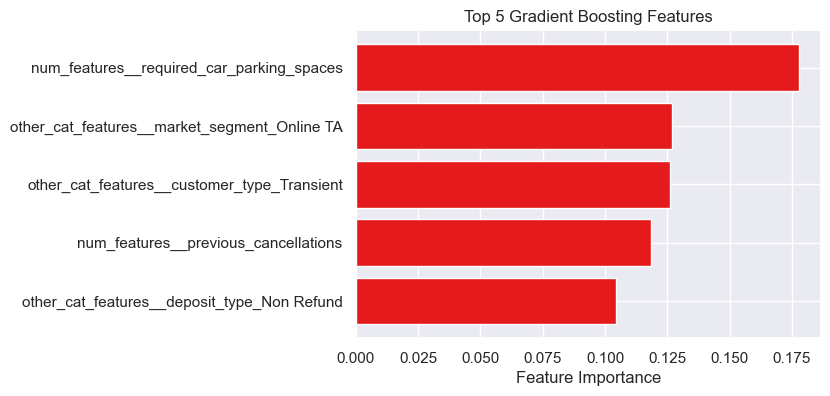

In [71]:
import pandas as pd
import matplotlib.pyplot as plt


gbc_model = gbc_tuning.named_steps['model']

# Feature Names after Transformation
try:
    feature_names = gbc_tuning.named_steps['transformer'].get_feature_names_out()
except:
    feature_names = X_train.columns  # fallback if no transformer

importances = gbc_model.feature_importances_


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select Top 5
top5_df = importance_df.head(5)
print("Top 5 Important Features:")
print(top5_df)

# Bar Plot
plt.figure(figsize=(6,4))
plt.barh(top5_df['Feature'], top5_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Top 5 Gradient Boosting Features")
plt.gca().invert_yaxis()
plt.show()

In [72]:
gbc_tuning['model'].feature_importances_

array([0.003353  , 0.00910678, 0.01033979, 0.01495521, 0.02446129,
       0.02550971, 0.02358102, 0.0267193 , 0.00309579, 0.0122808 ,
       0.0214007 , 0.00195171, 0.0099536 , 0.12682105, 0.        ,
       0.10433235, 0.00455904, 0.00353458, 0.12597912, 0.0075955 ,
       0.01307983, 0.00250208, 0.00422833, 0.00382092, 0.00443254,
       0.00423841, 0.00216025, 0.        , 0.        , 0.1184267 ,
       0.04501581, 0.00411325, 0.17779205, 0.0606595 ])

In [73]:
gbc_tuning['transformer'].transformers_[0][2]

['country']

In [74]:
(gbc_tuning['transformer'].transformers_[1][1].get_feature_names_out())

array(['market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reserved_room_type_B', 'reserved_room_type_C',
       'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L',
       'reserved_room_type_P'], dtype=object)

In [75]:
list(gbc_tuning['transformer'].transformers_[2][2])


['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [76]:
feat_scale = gbc_tuning['transformer'].transformers_[0][2]
feat_onehot = list(gbc_tuning['transformer'].transformers_[1][1].get_feature_names_out())
feat_remainder = list(gbc_tuning['transformer'].transformers_[2][2])  # <- use directly

feat = feat_scale + feat_onehot + feat_remainder
feat

['country',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'reserved_room_type_B',
 'reserved_room_type_C',
 'reserved_room_type_D',
 'reserved_room_type_E',
 'reserved_room_type_F',
 'reserved_room_type_G',
 'reserved_room_type_H',
 'reserved_room_type_L',
 'reserved_room_type_P',
 'previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [77]:
imp = pd.DataFrame({
    'feature':selected_feature_names,
    'importance':gbc_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp

,feature,importance
32,required_car_parking_spaces,0.177792
13,market_segment_Online TA,0.126821
18,customer_type_Transient,0.125979
29,previous_cancellations,0.118427
15,deposit_type_Non Refund,0.104332
33,total_of_special_requests,0.060660
30,booking_changes,0.045016
7,country_7,0.026719
5,country_5,0.025510
4,country_4,0.024461


In [78]:
ct = pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'])
ct

is_canceled,0,1
required_car_parking_spaces,,
0,6058,2396
1,1605,0
2,22,0
3,1,0
8,2,0


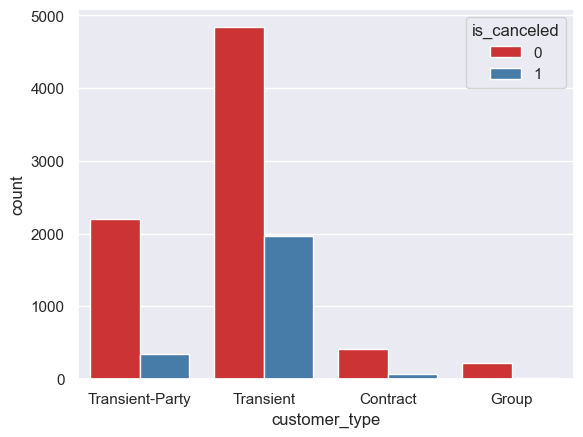

In [79]:
sns.countplot(data=df, x='customer_type', hue='is_canceled');

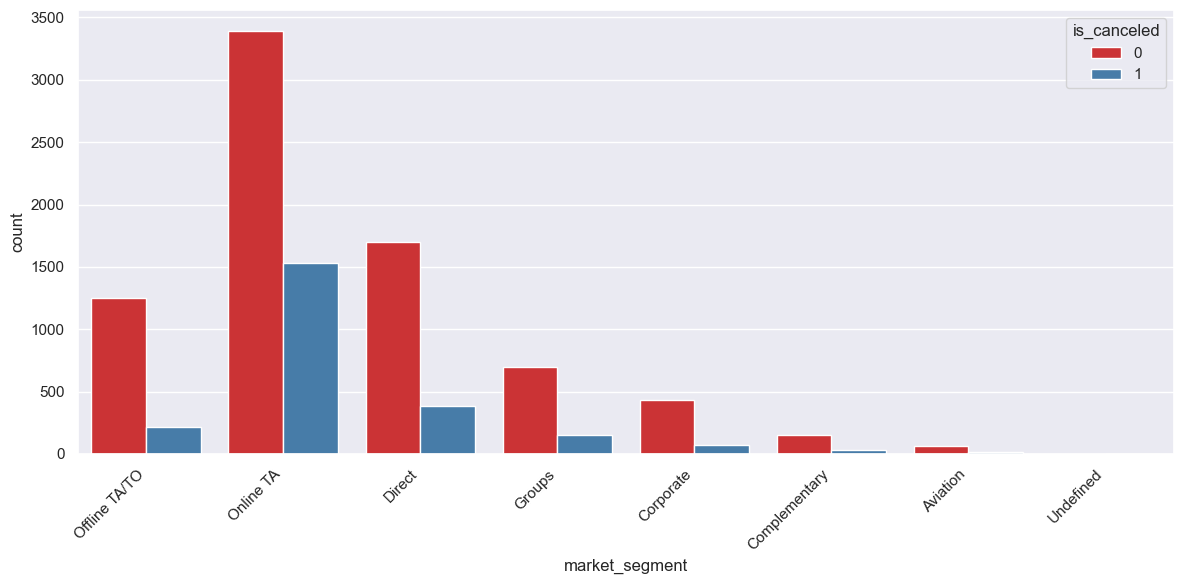

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='market_segment', hue='is_canceled')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## EXPLAINABLE AI 

### Menggunakan SHAP

In [81]:
import sys
!{sys.executable} -m pip install shap

In [82]:
import shap

### SHAP untuk seluruh dataset

In [83]:
# best model
gbc_tuning

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('country_feature',
                                                  BinaryEncoder(cols=['country'],
                                                                drop_invariant=True),
                                                  ['country']),
                                                 ('other_cat_features',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('num_features',
                                                  RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.03, max_depth=5,
                                            min_samples_leaf=4,
                                            min_samples_split=10,
                                            n_estimators=300, random_state=0,
                                            subsample=0.8))])

In [84]:
# Model and Data from Pipeline
my_model = gbc_tuning[-1]
my_data = gbc_tuning[0].transform(X_train)

# my_model, my_data

In [85]:
# define explainer
explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data,
    # feature_dependence= 'independent',
    # model_output= 'probability'
)

explainer_shap

In [86]:
# Shap value for every row in data frame
shap_values = explainer_shap.shap_values(my_data)
shap_values

 99%|===================| 8017/8067 [02:09<00:00]        

array([[ 0.00000000e+00, -2.05211532e-03,  1.90942485e-02, ...,
         1.54025200e-02, -3.46766187e+00, -4.30741831e-02],
       [ 0.00000000e+00, -7.18920255e-03,  3.14195202e-02, ...,
         2.68882179e-03, -4.45345468e+00,  5.11402090e-02],
       [ 0.00000000e+00, -1.48152584e-03, -1.05757959e-02, ...,
         1.62824908e-02, -3.64329326e+00, -1.95148881e-02],
       ...,
       [ 0.00000000e+00, -6.27818813e-03, -3.07150139e-01, ...,
         6.81392731e-03,  5.84908854e-01,  3.24585175e-01],
       [ 0.00000000e+00,  9.72577214e-03,  8.17697800e-02, ...,
         2.22383300e-02,  5.11743094e-01, -1.28269510e-01],
       [ 0.00000000e+00,  1.22489637e-03,  9.49703170e-03, ...,
         4.02839779e-03, -4.66293820e+00,  4.54741582e-02]])

In [87]:
list_feat = gbc_tuning.named_steps['transformer'].get_feature_names_out()

feat = [i.split("__")[1] for i in list_feat] 
feat

['country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6',
 'country_7',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'reserved_room_type_B',
 'reserved_room_type_C',
 'reserved_room_type_D',
 'reserved_room_type_E',
 'reserved_room_type_F',
 'reserved_room_type_G',
 'reserved_room_type_H',
 'reserved_room_type_L',
 'reserved_room_type_P',
 'previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

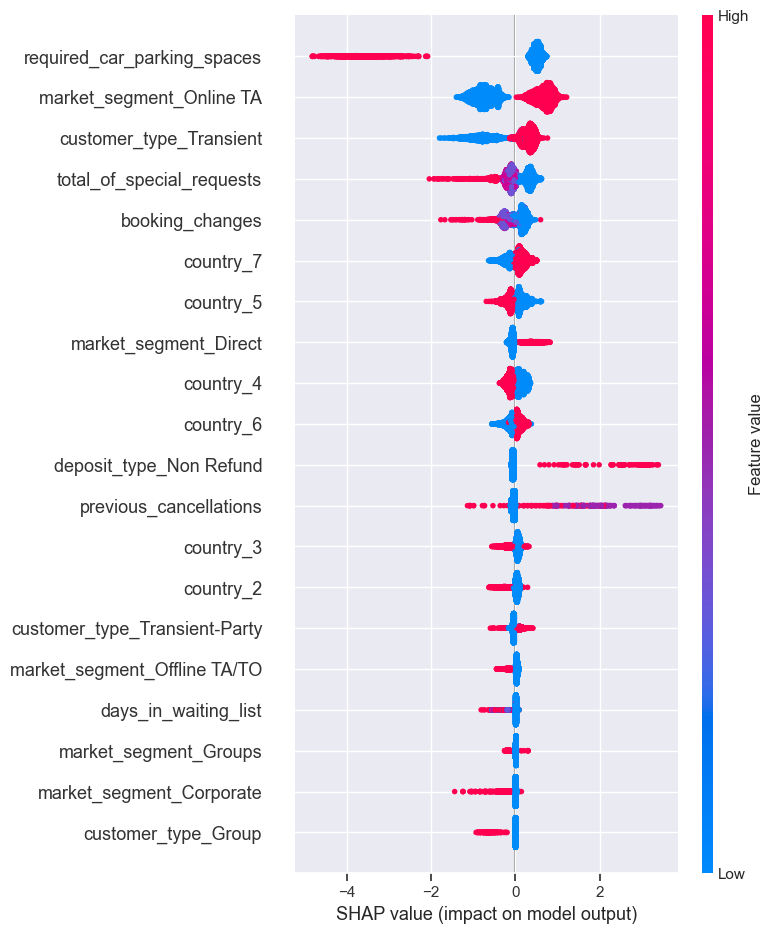

In [88]:
shap.summary_plot(shap_values, my_data, feature_names=feat)

Insight:
- required_car_parking_spaces:
    - semakin banyak space parkir yang dibutuhkan, probability untuk cancel booking cenderung tinggi
    - semakin sedikit space parkir yang dibutuhkan, probability untuk cancel booking cenderung rendah
- market_segment_Online TA:
    - customer dari segmen Online TA cenderung memiliki probability cancel booking lebih tinggi
    - customer dari segmen lain (Low feature value) cenderung memiliki probability cancel booking lebih rendah
- customer_type_Transient:
    - customer tipe Transient cenderung memiliki probability cancel booking lebih tinggi
    - customer tipe lain cenderung memiliki probability cancel booking lebih rendah

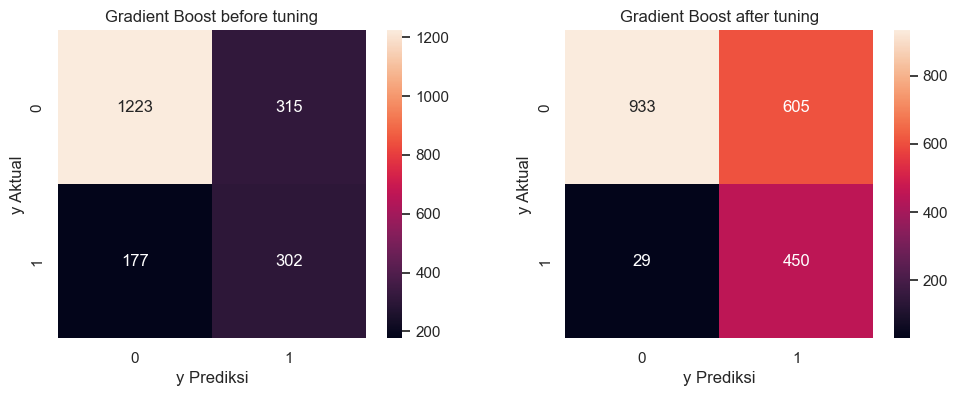

In [89]:
plt.figure(figsize=(12,4))

# Model XGBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Gradient Boost before tuning')

# Model XGBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_test_best), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Gradient Boost after tuning');

In [90]:
y_test.value_counts()

is_canceled
0    1538
1     479
Name: count, dtype: int64

## **Section 8. Conclusion and Recommendation**

**10.1 Conclusion**


Conclusion (Model)

In [91]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.61      0.75      1538
           1       0.43      0.94      0.59       479

    accuracy                           0.69      2017
   macro avg       0.70      0.77      0.67      2017
weighted avg       0.84      0.69      0.71      2017



Berdasarkan hasil classification report dari model Gradient Boosting kita, kita dapat menyimpulkan bahwa bila seandainya nanti kita menggunakan model ini untuk memprediksi pembatalan pemesanan hotel, maka model kita dapat menangkap 94% pemesanan yang dibatalkan dari seluruh pemesanan yang dibatalkan (berdasarkan recall kelas 1).

Selain itu, model ini juga dapat mengenali 61% pemesanan yang tidak dibatalkan dari seluruh pemesanan yang tidak dibatalkan (berdasarkan recall kelas 0), sehingga dapat membantu hotel meminimalkan risiko salah menandai pemesanan yang aman sebagai berisiko dibatalkan.

Model kita memiliki ketepatan prediksi pembatalan sebesar 43% (precision kelas 1), yang berarti setiap model memprediksi sebuah pemesanan akan dibatalkan, kemungkinan prediksinya benar sekitar 43%. Sedangkan untuk pemesanan yang tidak dibatalkan, ketepatan prediksi (precision kelas 0) sebesar 97%, sehingga sebagian besar prediksi pemesanan aman benar-benar tidak dibatalkan.

Dengan demikian, model ini cukup efektif untuk menangkap pemesanan yang berisiko dibatalkan sehingga hotel dapat mengambil tindakan mitigasi, meskipun prediksi pembatalan masih memiliki beberapa false positive.

Conclusion (Business)

Bila seandainya biaya kerugian akibat pembatalan kamar (False Negative) sekitar $150 per kamar dan biaya yang hilang akibat memprediksi pemesanan akan dibatalkan padahal tidak (False Positive) sekitar $45 per kamar, maka hitungannya kurang lebih akan seperti ini, dengan asumsi jumlah pemesanan dalam suatu periode adalah 200 pemesanan (100 dibatalkan, 100 tidak dibatalkan):

Tanpa Model (semua pemesanan diasumsikan berisiko dibatalkan dan perlu mitigasi):
- Total Biaya = 200 x $45 = $9,000 (biaya mitigasi untuk semua pemesanan)
- Total Pemesanan yang benar-benar dibatalkan yang ditangani = 100 orang (karena semua diasumsikan berisiko)
- Total Pemesanan yang dibatalkan tapi tidak ditangani = 0 orang
- Biaya yang terbuang = 100 x $45 = $4,500 (untuk pemesanan yang sebenarnya tidak dibatalkan tetapi tetap diasumsikan berisiko)
- Jumlah penghematan = 0 USD

Dengan Model Gradient Boosting (menggunakan prediksi setelah tuning):
- Total Pemesanan yang diprediksi berisiko dibatalkan = 450 + 605 = 1,055 pemesanan (dari confusion matrix, skala disesuaikan ke 200 pemesanan → proporsional)
- Total Biaya ≈ (pemenuhan FN) + (biaya FP)
    - FN (pemesanan dibatalkan tapi tidak diprediksi dibatalkan) = 29 → 29 x $150 = $4,350
    - FP (pemesanan tidak dibatalkan tapi diprediksi dibatalkan) = 605 → proporsional: 605 / 1,538 ≈ 78% → 78 x $45 ≈ $3,510
- Total Biaya ≈ $4,350 + $3,510 = $7,860
- Total Pemesanan dibatalkan yang benar-benar ditangani = 450 → proporsional: 450 / 479 ≈ 94% dari pemesanan dibatalkan
    -Pemesanan dibatalkan yang tidak ditangani = 29 → 6%
- Biaya yang terbuang untuk pemesanan yang tidak dibatalkan = $3,510
- Jumlah penghematan dibanding tanpa model = $4,500 - $3,510 ≈ $990

Berdasarkan perhitungan tersebut, terlihat bahwa dengan menggunakan model Gradient Boosting yang sudah dituning, hotel dapat:
1. Memenuhi target performa dengan F2 Score ≥ 0,7 pada data validasi dan mengidentifikasi 3–5 fitur utama yang paling berpengaruh terhadap pembatalan.
2. Menangkap sebagian besar pemesanan berisiko dibatalkan (recall 94% untuk kelas 1) sehingga dapat diambil tindakan mitigasi tepat waktu.
3. Mengurangi biaya yang terbuang akibat False Positive dibandingkan strategi tanpa model, dengan estimasi penghematan sekitar $990 per periode (asumsi 200 pemesanan).
4. Mendukung strategi pengurangan kerugian minimal 10% melalui prediksi yang dapat ditindaklanjuti secara nyata.

**10.2 Recommendation**

**1. Recommendation (Model)**

1. Menggunakan model Gradient Boosting hasil tuning sebagai model utama karena memenuhi target F2 Score ≥ 0,7, memiliki recall tinggi untuk kelas pembatalan (94%), dan mampu mengidentifikasi fitur-fitur utama yang mempengaruhi pembatalan.

2. Melakukan pemantauan berkala terhadap performa model dengan data terbaru untuk memastikan konsistensi kinerja.

3. Melakukan retraining model secara periodik (misalnya tiap 3–6 bulan) atau saat terjadi perubahan signifikan pada pola data pemesanan.

4. Mengintegrasikan model ke dalam sistem manajemen pemesanan hotel sehingga prediksi risiko pembatalan dapat diakses secara real-time oleh tim operasional.

**2. Recommendation (Business)**

1. Kebijakan pembayaran awal (misalnya deposit sebagian) untuk pemesanan yang diprediksi memiliki risiko pembatalan tinggi, guna mengurangi kerugian finansial.
2. Penawaran ulang kamar (reselling) untuk pemesanan berisiko tinggi yang dibatalkan, dengan memanfaatkan sistem booking online atau partner OTA.
3. Peningkatan komunikasi proaktif kepada tamu berisiko tinggi, seperti pengingat via email/SMS atau penawaran diskon kecil jika tamu mengonfirmasi kembali kedatangannya.
4. Fleksibilitas penjadwalan untuk mengalihkan pembatalan menjadi pemesanan ulang pada tanggal lain, mengurangi kehilangan pendapatan langsung.
5. Menetapkan target pengurangan kerugian minimal 10% sebagai indikator keberhasilan penerapan strategi pencegahan berbasis prediksi model.